In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv" , nrows=100000)
song=pd.read_csv("songs.csv")
extra_info=pd.read_csv("song_extra_info.csv")
mem=pd.read_csv("members.csv")

In [33]:
train.head(1)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1


In [34]:
song.head(1)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0


In [35]:
tp1 = pd.merge(train,song,on='song_id')
tp1.head(1)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0


In [36]:
tp2 = pd.merge(tp1,extra_info,on='song_id',how='left')
tp2.head(1)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854


In [37]:
song_df=pd.merge(tp2,mem,on="msno",how='left')
song_df.head(1)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854,1,0,NaN,7,20120102,20171005


In [38]:
del song , extra_info , mem , train , tp1, tp2

In [39]:
song_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854,1,0,NaN,7,20120102,20171005
1,e5Ezre9HPuPos+CXQXtmo32E/hHIZTMmo6jG3yRf6UA=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-playlist,1,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854,22,47,female,3,20150513,20171019
2,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854,15,18,male,4,20151220,20170930
3,sSexP400TJOZRhx3JB+0s9cqrCnqrlV51B9njoKR1II=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854,12,38,male,3,20111218,20180920
4,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,20110525,20170911


In [40]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99995
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    99996 non-null  object 
 1   song_id                 99996 non-null  object 
 2   source_system_tab       99693 non-null  object 
 3   source_screen_name      95723 non-null  object 
 4   source_type             99801 non-null  object 
 5   target                  99996 non-null  int64  
 6   song_length             99996 non-null  int64  
 7   genre_ids               98498 non-null  object 
 8   artist_name             99996 non-null  object 
 9   composer                78528 non-null  object 
 10  lyricist                59309 non-null  object 
 11  language                99996 non-null  float64
 12  name                    99987 non-null  object 
 13  isrc                    91471 non-null  object 
 14  city                    99996 non-null

In [41]:
import missingno as msno

<AxesSubplot:>

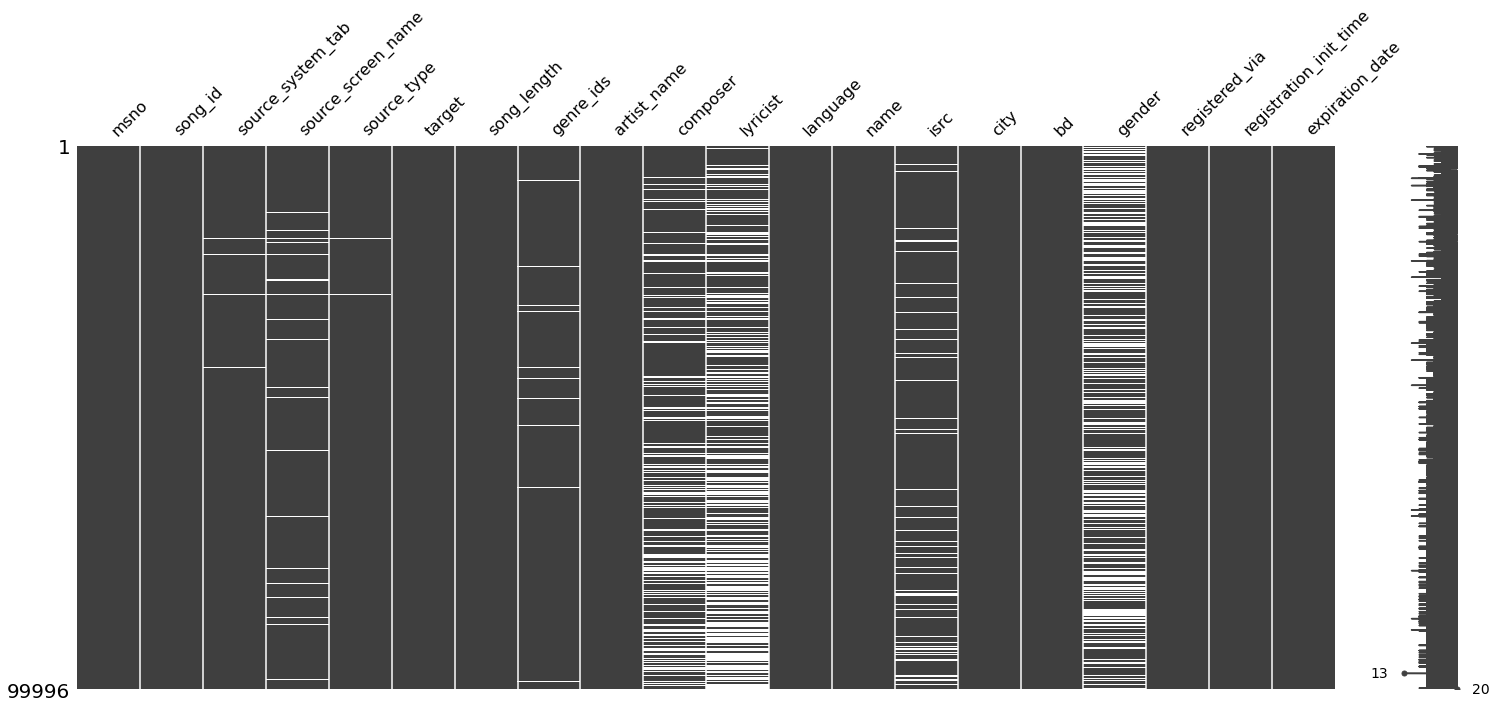

In [42]:
msno.matrix(song_df)

In [43]:
for i in song_df.select_dtypes(include=['object']).columns:
    song_df[i][song_df[i].isnull()] = 'unknown'
song_df = song_df.fillna(value=0)

C:\Users\Dell\AppData\Local\Temp\ipykernel_3252\2864543957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_df[i][song_df[i].isnull()] = 'unknown'
C:\Users\Dell\AppData\Local\Temp\ipykernel_3252\2864543957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_df[i][song_df[i].isnull()] = 'unknown'
C:\Users\Dell\AppData\Local\Temp\ipykernel_3252\2864543957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_df[i][song_df

In [44]:
song_df.registration_init_time = pd.to_datetime(song_df.registration_init_time, format='%Y%m%d', errors='ignore')
song_df['registration_init_time_year'] = song_df['registration_init_time'].dt.year
song_df['registration_init_time_month'] = song_df['registration_init_time'].dt.month
song_df['registration_init_time_day'] = song_df['registration_init_time'].dt.day

song_df.expiration_date = pd.to_datetime(song_df.expiration_date,  format='%Y%m%d', errors='ignore')
song_df['expiration_date_year'] = song_df['expiration_date'].dt.year
song_df['expiration_date_month'] = song_df['expiration_date'].dt.month
song_df['expiration_date_day'] = song_df['expiration_date'].dt.day

In [45]:
song_df.head(3)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471,359,Bastille,Dan Smith| Mark Crew,...,unknown,7,2012-01-02,2017-10-05,2012,1,2,2017,10,5
1,e5Ezre9HPuPos+CXQXtmo32E/hHIZTMmo6jG3yRf6UA=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-playlist,1,206471,359,Bastille,Dan Smith| Mark Crew,...,female,3,2015-05-13,2017-10-19,2015,5,13,2017,10,19
2,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0,206471,359,Bastille,Dan Smith| Mark Crew,...,male,4,2015-12-20,2017-09-30,2015,12,20,2017,9,30


In [46]:
from sklearn.preprocessing import LabelEncoder 

In [47]:
encoder = LabelEncoder()

for i in song_df.columns :
    song_df[i] = encoder.fit_transform(song_df[i])

In [48]:
song_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,1647,6021,1,6,5,1,3513,94,424,1615,...,2,2,1176,328,8,0,1,4,9,4
1,4049,6021,3,7,4,1,3513,94,424,1615,...,0,0,2142,342,11,4,12,4,9,18
2,5169,6021,0,10,5,0,3513,94,424,1615,...,1,1,2348,323,11,11,19,4,8,29
3,5455,6021,0,10,5,0,3513,94,424,1615,...,1,0,1162,632,7,11,17,5,8,19
4,3471,18024,3,7,4,1,8945,28,3757,7664,...,0,3,974,304,7,4,24,4,8,10


<AxesSubplot:>

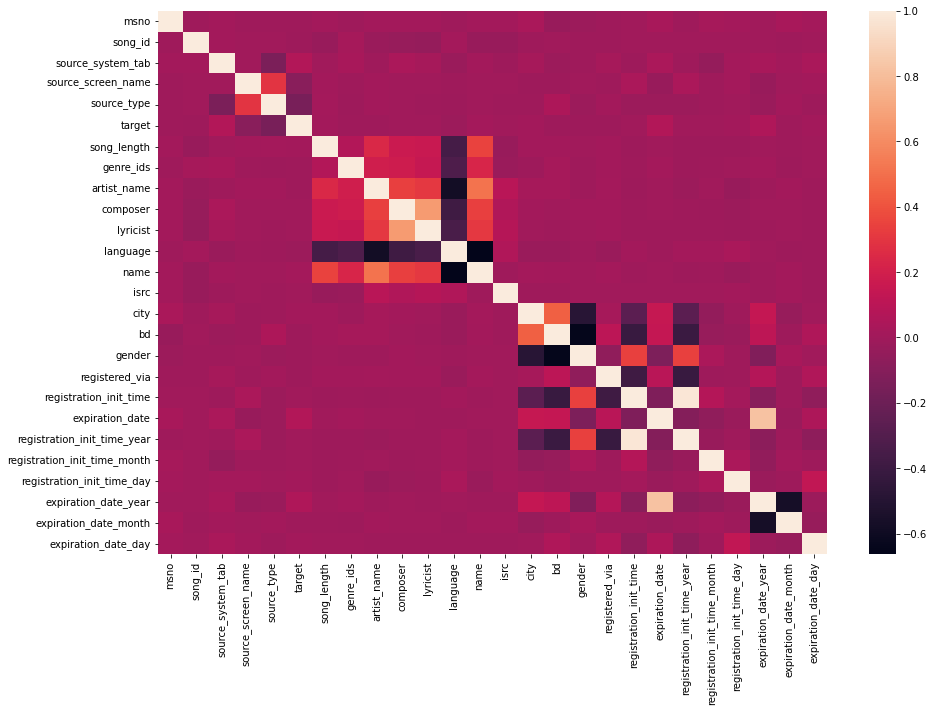

In [49]:
plt.figure(figsize=[15,10])
sns.heatmap(song_df.corr())

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [51]:
X , y = song_df.drop('target' , axis=1) , song_df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [52]:
randFor = RandomForestClassifier()
randFor.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
predict= randFor.predict(X_test)
score=accuracy_score(y_test , predict)

In [54]:
print("Accuracy is ", score*100," %")

Accuracy is  84.81  %
